# Quiz 3

This notebook is created by Chinchuthakun Worameth as a part of Complex Network (ART.T462) at Tokyo Institute of Technology taught in Fall semester 2021 by Prof. Murata Tsuyoshi. It contains

1. A program of computing average degree, density, and $L_3$ of $K_6$ and $K_{3,3}$

## Question #1

Let $\mathbf{G} = (\mathbf{V},\mathbf{E})$ and $\mathbf{A}$ be an undirected graph and an adjacency matrix associated with $\mathbf{G}$, respectively. Assuming that $|V| = n$ and $|E| = m$, we define average degree ($c$) and density ($\rho$) of $\mathbf{G}$ as:
\begin{equation}
c = \frac{1}{n}\sum_{i=1}^{n} \Big( \sum_{j=1}^{n} \mathbf{A}_{ij} \Big) = \frac{2m}{n}
\end{equation}
and
\begin{equation}
\rho = \frac{m}{n \choose 2} = \frac{c}{n-1} \approx \frac{c}{n}
\end{equation}

## Question #2

Now, we will compute average degree ($c$), density ($\rho$), and number of walk of length 3 ($L_3$) of **complete graph on 6 nodes** ($K_6$) and **complete bipartite graph on 6 nodes** ($K_{3,3}$).

First, we use library `networkx` to construst the graphs and visualize them.

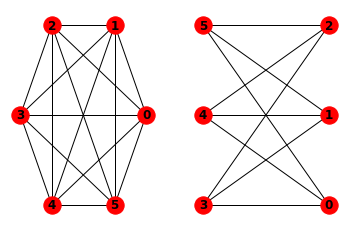

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout

GList = [nx.complete_graph(6)] # K6

G = nx.Graph() # K3,3
G.add_nodes_from([0, 1, 2], bipartite=0)
G.add_nodes_from([3, 4, 5], bipartite=1)
G.add_edges_from([(0,3),(0,4),(0,5),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)])
GList.append(G)

plt.subplot(121)
nx.draw_circular(GList[0], node_size=300, node_color='red', with_labels=True, font_weight='bold')
plt.subplot(122)
bottom_nodes, top_nodes = bipartite.sets(GList[1])
pos = bipartite_layout(GList[1], top_nodes)
nx.draw(GList[1], pos=pos, node_size=300, node_color='red', with_labels=True, font_weight='bold')

Then, we construct their adjacency matrixs and apply formulas discussed in Question #1. Note that $L_3 = \text{tr}(A^3)$ as mentioned in the previous assignment.

In [21]:
cList = []
rhoList = []
L3List = []
for G in GList:
  cList.append(2. * G.number_of_edges() / G.number_of_nodes())
  rhoList.append(cList[-1] / (G.number_of_nodes() - 1))
  A = nx.adjacency_matrix(G).todense()
  L3List.append(np.trace(A**3))

In [22]:
GName = [" K6 ", " K3,3 "]
for name, c, rho, L3 in zip(GName, cList, rhoList, L3List):
  print("#"*10 + name + "#"*10)
  print(f"Average degree = {c}")
  print(f"Density = {rho}")
  print(f"L3 = {L3}")

########## K6 ##########
Average degree = 5.0
Density = 1.0
L3 = 120
########## K3,3 ##########
Average degree = 3.0
Density = 0.6
L3 = 0


## Question #3 & #4

According to Kuratowski's theorem, every non-planar graphs must contain at least one subgraph that is an expansion of $K_5$ or $K_{3,3}$. Therefore, we can conclude that:

1. Since $K_6$ is a complete graph, every combinations of 5 nodes is a 5-clique, i.e. $K_5$. Therefore, it is not planar.
2. Since $K_{3,3}$ is a subgraph of itself, it is obviously not planar.